<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Gaussian_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [14]:
df = pd.read_csv('CC GENERAL.csv')
df = df.iloc[:,1:]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# Prepare data set
df = pd.get_dummies(df, drop_first=True).dropna()
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Text(0.5, 0, 'Number of Components')

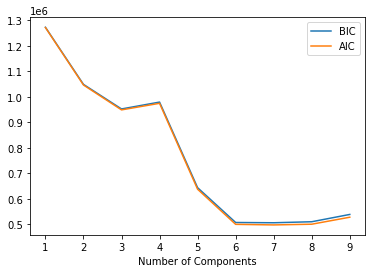

In [16]:
# Determine optimal number of cluster
n_components = np.arange(1,10)

models = [GaussianMixture(n,
                          random_state=1502).fit(df) for n in n_components]

plt.plot(n_components,
         [m.bic(df) for m in models],
         label="BIC")
plt.plot(n_components,
         [m.aic(df) for m in models],
         label="AIC")
plt.legend()
plt.xlabel("Number of Components")

In [17]:
# Create GMM model
model = GaussianMixture(6,
                        random_state=1502).fit(df)

# add the number of cluster
cluster = pd.Series(model.predict(df))
df["cluster"] = cluster 

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,5.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,5.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5.0


In [22]:
# Inteepretation
pd.DataFrame(model.means_,
             columns = list(df.iloc[:, 0:-1].columns))
# Cluster 0: lower middle Class
# Cluster 1: Inactive
# Cluster 2: High Rollers
# Cluster 3: Conscious High Income
# Cluster 4: Upper Middle Class
# Cluster 5: Active purchasers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1443.375634,0.885767,1108.745386,749.390397,359.354989,1912.623655,0.564650,0.277646,0.372276,0.266236,6.158501,15.445834,4238.566964,2567.479511,652.762795,0.142055,10.708244
1,161.867450,0.643264,678.061932,357.201874,320.860058,0.000000,0.521177,0.142003,0.382339,0.000000,0.000000,9.012971,3772.205298,893.755987,140.270631,0.329073,11.117176
2,4374.428069,0.932330,7049.876411,4396.521112,2667.837488,4020.535417,0.672316,0.357277,0.565899,0.248634,12.746635,61.501230,9398.735742,11030.005938,5688.153146,0.181830,11.571661
3,2181.706409,0.901941,0.000000,0.000000,0.000000,1987.797699,0.000000,0.000000,0.000000,0.277168,6.250400,0.000000,4038.595962,1670.740603,737.076510,0.046143,11.347262
4,3266.545766,1.000000,956.237722,552.448948,403.788773,1673.353167,0.569111,0.250637,0.412482,0.270239,6.356229,16.979847,5320.781312,1684.267810,2045.836460,0.000000,12.000000
5,1099.690598,1.000000,1585.497573,917.507259,667.990314,0.000000,0.772287,0.340255,0.595735,0.000000,0.000000,25.612458,4706.342127,1552.138392,545.838853,0.220209,12.000000
